In [7]:
%reload_ext autoreload
%autoreload 2

In [8]:
import retro
import scipy.misc
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import cv2 as cv

env = None

from EightBitTemplateMatcher import EightBitTemplateMatcher

In [9]:
sonic_dir = 'data/sonic2/sonic'
sonic_files = os.listdir( sonic_dir )
sonic_files.sort()
sonics = [ scipy.misc.imread( os.path.join( sonic_dir, sonic_file ), mode='RGBA' ) for sonic_file in sonic_files ]

eight_bit_matcher = EightBitTemplateMatcher( sonics )

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [10]:
if env is None:
    env = retro.make(game='SonicTheHedgehog2-Genesis', state='EmeraldHillZone.Act1')
_ = env.reset()

KeyboardInterrupt: 

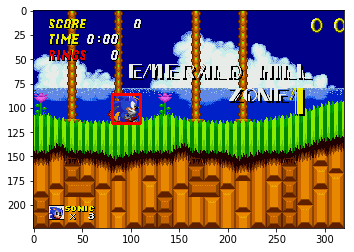

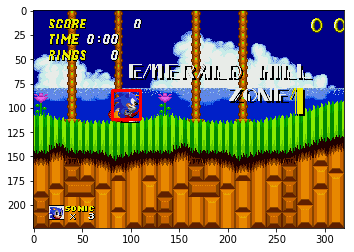

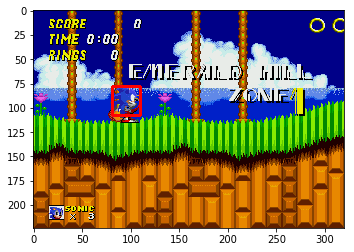

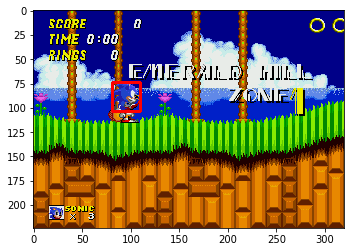

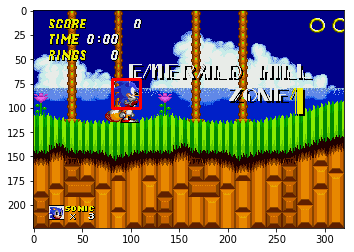

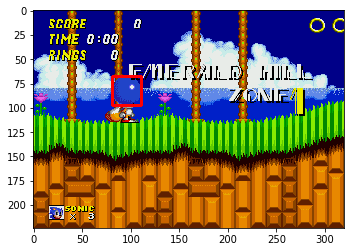

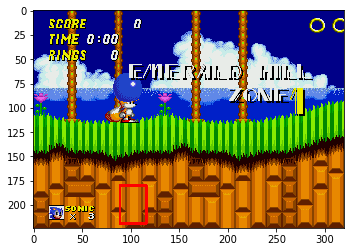

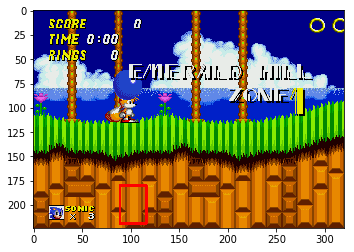

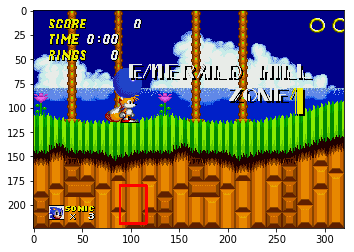

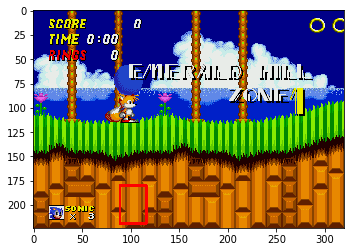

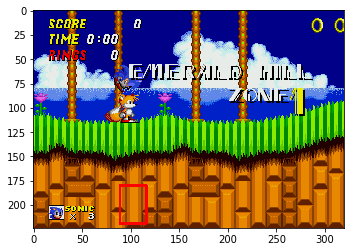

In [15]:
for i in range( 1000 ):
    action = env.action_space.sample()
    action[ 7 ] = 1
    frame, reward, done, info = env.step( action )
    env.render()

    frame = frame.copy()
    results = eight_bit_matcher.matchTemplate( frame )

    cv.rectangle( frame, results[ 1 ], results[ 2 ], 255, 2 )
    
    fig, ax = plt.subplots()
    ax.imshow( frame )
    
    if done:
        env.reset()